In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [2]:
import tensorflow as tf#to import tensorflow
from tensorflow.keras.models import Model, Sequential# to create sequential model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
#concolutional layer -- maxpooling layer -- dense(all connected)-- flatten 2d to 1d -- dropout(shut down neurons) -- bn?
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [3]:

# 🔥 Step 1: Define AlexNet Model
def build_alexnet():
    model = Sequential([
        # Layer 1: Convolution + MaxPooling
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Layer 2: Convolution + MaxPooling
        Conv2D(256, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Layer 3-5: Convolution
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Flatten the output
        Flatten(),

        # Fully Connected Layers
        Dense(4096, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),  # Dropout to prevent overfitting
        Dense(4096, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),  # Dropout again
        Dense(1, activation='sigmoid')  # Binary Classification
    ])
     # Compile Model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# Instantiate Model
model = build_alexnet()
model.summary()  # Print model summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,285,441 (222.34 MB)

 Trainable params: 58,285,441 (222.34 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    target_size=(227, 227),  # 🔹 Changed to (227,227) for AlexNet
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 6404 images belonging to 2 classes.


In [7]:
val_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1601 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/test_set/test_set',
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 2023 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 145s 655ms/step - accuracy: 0.5027 - loss: 7.2859 - val_accuracy: 0.5003 - val_loss: 2.1540
Epoch 2/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 447ms/step - accuracy: 0.5167 - loss: 1.6905 - val_accuracy: 0.4997 - val_loss: 1.0079
Epoch 3/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 94s 453ms/step - accuracy: 0.5039 - loss: 0.9323 - val_accuracy: 0.5059 - val_loss: 0.7916
Epoch 4/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 91s 442ms/step - accuracy: 0.5057 - loss: 0.7708 - val_accuracy: 0.4997 - val_loss: 0.7292
Epoch 5/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 446ms/step - accuracy: 0.5137 - loss: 0.7216 - val_accuracy: 0.5134 - val_loss: 0.7051
Epoch 6/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 93s 450ms/step - accuracy: 0.5443 - loss: 0.7012 - val_accuracy: 0.5815 - val_loss: 0.6874
Epoch 7/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 94s 455ms/step - accuracy: 0.5672 - loss: 0.6849 - val_accuracy: 0.5884 - val_loss: 0.6720
Epoch 8/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 92s 444ms/step - accuracy: 0.6012 - loss: 0.6668 - va

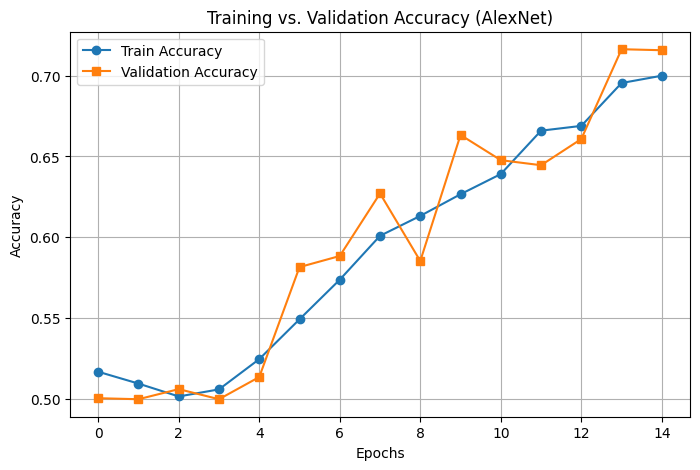

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy (AlexNet)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.6264 - loss: 0.6688
Test accuracy: 0.7054


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


<ipython-input-12-c46054deaa0a>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_labels[int(prediction[0] > 0.5)]  # Binary classification


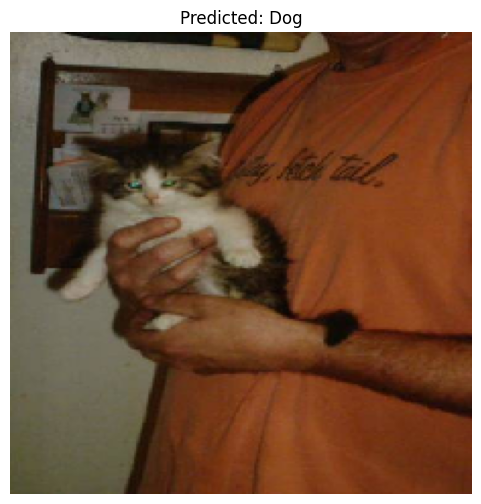

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def classify_image_alexnet(model, image_path, class_labels=('Cat', 'Dog')):
    """
    Classifies an image as Cat or Dog using the trained AlexNet model.
    
    Parameters:
        model (tf.keras.Model): Trained AlexNet model.
        image_path (str): Path to the input image.
        class_labels (tuple): Class labels (default: ('Cat', 'Dog'))
    
    Returns:
        None: Displays the image with prediction.
    """
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(227, 227))  # AlexNet requires 227x227 input size
    img_array = image.img_to_array(img) / 255.0  # Normalize image to 0-1 range
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = model.predict(img_array)
    predicted_label = class_labels[int(prediction[0] > 0.5)]  # Binary classification
    
    # Display image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {predicted_label}')
    plt.show()

# Example Usage:
image_path = "/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4002.jpg"  # Change to your image path
classify_image_alexnet(model, image_path)  # Use the trained AlexNet model